In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Dane do Zadania 1
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df_spam = pd.DataFrame(data_spam)

# Dane do Zadania 2
data_grypa = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}
df_grypa = pd.DataFrame(data_grypa)

Zadanie 1: Email Spam (Podpunkty a i b)

In [5]:
# --- Zadanie 1a i 1b: Implementacja "Ręczna" w Python ---

# 1. Obliczanie prawdopodobieństw a priori (Priors)
total_count = len(df_spam)
p_spam_tak = len(df_spam[df_spam['Spam'] == 'TAK']) / total_count
p_spam_nie = len(df_spam[df_spam['Spam'] == 'NIE']) / total_count

print(f"Prawdopodobieństwo a priori P(Spam=TAK): {p_spam_tak:.4f}")
print(f"Prawdopodobieństwo a priori P(Spam=NIE): {p_spam_nie:.4f}")
print("-" * 30)

# 2. Obliczanie prawdopodobieństw warunkowych
# Dane wejściowe do predykcji
nowy_email = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

def calculate_conditional_prob(df, feature, value, target_class):
    # Wybieramy podzbiór danych dla danej klasy (Spam=TAK lub NIE)
    subset = df[df['Spam'] == target_class]
    # Liczymy ile razy wystąpiła wartość cechy w tej klasie
    count = len(subset[subset[feature] == value])
    # Dzielimy przez liczebność klasy
    prob = count / len(subset)
    return prob

# Obliczenia dla klasy TAK
p_s1_tak = calculate_conditional_prob(df_spam, 'Słowo_1', nowy_email['Słowo_1'], 'TAK')
p_s2_tak = calculate_conditional_prob(df_spam, 'Słowo_2', nowy_email['Słowo_2'], 'TAK')
p_ex_tak = calculate_conditional_prob(df_spam, 'Wykrzyknik', nowy_email['Wykrzyknik'], 'TAK')

# Obliczenia dla klasy NIE
p_s1_nie = calculate_conditional_prob(df_spam, 'Słowo_1', nowy_email['Słowo_1'], 'NIE')
p_s2_nie = calculate_conditional_prob(df_spam, 'Słowo_2', nowy_email['Słowo_2'], 'NIE')
p_ex_nie = calculate_conditional_prob(df_spam, 'Wykrzyknik', nowy_email['Wykrzyknik'], 'NIE')

print("Prawdopodobieństwa warunkowe:")
print(f"P('darmowy'|TAK) = {p_s1_tak:.2f}, P('darmowy'|NIE) = {p_s1_nie:.2f}")
print(f"P('wygrana'|TAK) = {p_s2_tak:.2f}, P('wygrana'|NIE) = {p_s2_nie:.2f}")
print(f"P('Wykrzyknik'|TAK) = {p_ex_tak:.2f}, P('Wykrzyknik'|NIE) = {p_ex_nie:.2f}")
print("-" * 30)

# 3. Predykcja (Obliczanie licznika Naive Bayes)
# Score = Prior * P(cecha1|klasa) * P(cecha2|klasa) ...

score_tak = p_spam_tak * p_s1_tak * p_s2_tak * p_ex_tak
score_nie = p_spam_nie * p_s1_nie * p_s2_nie * p_ex_nie

print(f"Wynik surowy dla SPAM=TAK: {score_tak:.6f}")
print(f"Wynik surowy dla SPAM=NIE: {score_nie:.6f}")

# Normalizacja
total_score = score_tak + score_nie
prob_final_tak = score_tak / total_score if total_score > 0 else 0
prob_final_nie = score_nie / total_score if total_score > 0 else 0

print(f"\nZnormalizowane P(Spam=TAK|Email): {prob_final_tak:.4f}")
print(f"Znormalizowane P(Spam=NIE|Email): {prob_final_nie:.4f}")

Prawdopodobieństwo a priori P(Spam=TAK): 0.3333
Prawdopodobieństwo a priori P(Spam=NIE): 0.6667
------------------------------
Prawdopodobieństwa warunkowe:
P('darmowy'|TAK) = 1.00, P('darmowy'|NIE) = 0.00
P('wygrana'|TAK) = 0.50, P('wygrana'|NIE) = 0.00
P('Wykrzyknik'|TAK) = 1.00, P('Wykrzyknik'|NIE) = 0.38
------------------------------
Wynik surowy dla SPAM=TAK: 0.166667
Wynik surowy dla SPAM=NIE: 0.000000

Znormalizowane P(Spam=TAK|Email): 1.0000
Znormalizowane P(Spam=NIE|Email): 0.0000


Zadanie 1: Email Spam (Podpunkt c - Sklearn)

In [6]:
# --- Zadanie 1c: Implementacja Sklearn ---


df_encoded = df_spam.copy()
le_dict = {}

# Enkoder dla cech i targetu
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

X = df_encoded[['Słowo_1', 'Słowo_2', 'Wykrzyknik']]
y = df_encoded['Spam']

# Trenowanie modelu
# alpha=1.0 to domyślne wygładzanie Laplace'a (zapobiega mnożeniu przez zero)
clf = CategoricalNB(alpha=1.0)
clf.fit(X, y)

# Przygotowanie nowego emaila do predykcji
# Musimy zamienić słowa na te same numery co w treningu
new_sample = pd.DataFrame({
    'Słowo_1': [le_dict['Słowo_1'].transform(['darmowy'])[0]],
    'Słowo_2': [le_dict['Słowo_2'].transform(['wygrana'])[0]],
    'Wykrzyknik': [le_dict['Wykrzyknik'].transform(['TAK'])[0]]
})

# Predykcja
proba = clf.predict_proba(new_sample)
classes = le_dict['Spam'].classes_

print("Wyniki ze Sklearn (CategoricalNB):")
for i, class_name in enumerate(classes):
    print(f"P(Spam={class_name}): {proba[0][i]:.4f}")

print("\nWyjaśnienie różnic:")
print("W obliczeniach ręcznych (czyste częstości) prawdopodobieństwo dla klasy NIE wyszło 0,")
print("ponieważ słowo 'darmowy' nigdy nie wystąpiło w mailach, które nie są spamem.")
print("Sklearn domyślnie używa wygładzania Laplace'a (dodaje 1 do licznika),")
print("dlatego wynik dla NIE jest mały, ale niezerowy.")

Wyniki ze Sklearn (CategoricalNB):
P(Spam=NIE): 0.0321
P(Spam=TAK): 0.9679

Wyjaśnienie różnic:
W obliczeniach ręcznych (czyste częstości) prawdopodobieństwo dla klasy NIE wyszło 0,
ponieważ słowo 'darmowy' nigdy nie wystąpiło w mailach, które nie są spamem.
Sklearn domyślnie używa wygładzania Laplace'a (dodaje 1 do licznika),
dlatego wynik dla NIE jest mały, ale niezerowy.


Zadanie 2: Diagnoza Grypy (Podpunkt a)

Liczba przypadków grypy:
Grypa
TAK    8
NIE    7
Name: count, dtype: int64
------------------------------
Analiza wpływu cech (P(Cecha|Grypa)):

Cecha: Gorączka
Grypa             NIE   TAK
Gorączka                   
niska        0.714286  0.00
umiarkowana  0.142857  0.25
wysoka       0.142857  0.75

Cecha: Kaszel
Grypa        NIE  TAK
Kaszel               
NIE     0.857143  0.0
TAK     0.142857  1.0

Cecha: Zmęczenie
Grypa             NIE    TAK
Zmęczenie                   
duże         0.000000  0.875
małe         0.857143  0.000
umiarkowane  0.142857  0.125


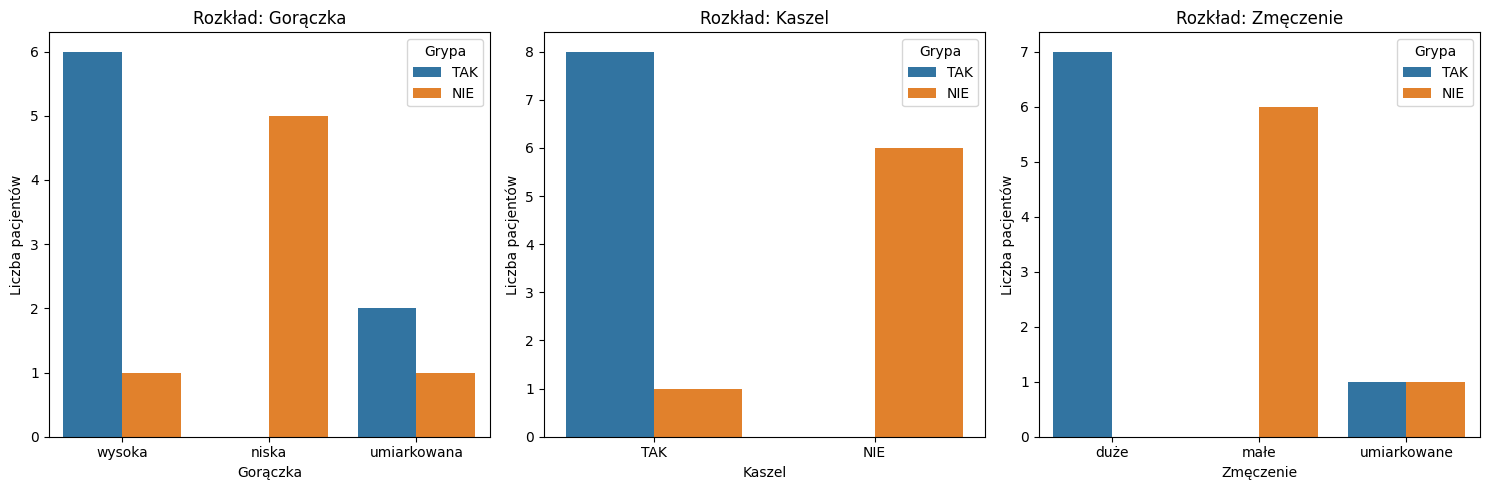

In [7]:
# --- Zadanie 2a: Analiza danych grypy ---

# 1. Ile przypadków grypy?
grypa_counts = df_grypa['Grypa'].value_counts()
print("Liczba przypadków grypy:")
print(grypa_counts)
print("-" * 30)

# 2. Która cecha najbardziej wskazuje na grypę?
# Analizujemy prawdopodobieństwa warunkowe P(Cecha|Grypa=TAK) vs P(Cecha|Grypa=NIE)
features = ['Gorączka', 'Kaszel', 'Zmęczenie']

print("Analiza wpływu cech (P(Cecha|Grypa)):")
for col in features:
    # Tabela krzyżowa znormalizowana po kolumnach (Grypa)
    crosstab = pd.crosstab(df_grypa[col], df_grypa['Grypa'], normalize='columns')
    print(f"\nCecha: {col}")
    print(crosstab)

# 3. Wizualizacja
plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df_grypa, x=col, hue='Grypa')
    plt.title(f'Rozkład: {col}')
    plt.ylabel('Liczba pacjentów')

plt.tight_layout()
plt.show()

Zadanie 2: Diagnoza Grypy (Podpunkt b)

In [8]:
# --- Zadanie 2b: Predykcja dla pacjentów A, B, C ---

# Funkcja pomocnicza do obliczania prawdopodobieństwa grypy
def predict_flu_manual(features_dict, df):
    # Priors
    p_flu_tak = len(df[df['Grypa'] == 'TAK']) / len(df)
    p_flu_nie = len(df[df['Grypa'] == 'NIE']) / len(df)

    # Warunkowe dla TAK i NIE
    prob_tak = p_flu_tak
    prob_nie = p_flu_nie

    for feature, value in features_dict.items():
        # P(cecha|TAK)
        p_feat_tak = len(df[(df['Grypa']=='TAK') & (df[feature]==value)]) / len(df[df['Grypa']=='TAK'])
        prob_tak *= p_feat_tak

        # P(cecha|NIE)
        p_feat_nie = len(df[(df['Grypa']=='NIE') & (df[feature]==value)]) / len(df[df['Grypa']=='NIE'])
        prob_nie *= p_feat_nie

    # Normalizacja
    total = prob_tak + prob_nie
    if total == 0: return 0 # Zabezpieczenie

    return prob_tak / total

# Definicja pacjentów
pacjenci = {
    'Pacjent A': {'Gorączka': 'wysoka', 'Kaszel': 'TAK', 'Zmęczenie': 'duże'},
    'Pacjent B': {'Gorączka': 'niska', 'Kaszel': 'NIE', 'Zmęczenie': 'małe'},
    'Pacjent C': {'Gorączka': 'umiarkowana', 'Kaszel': 'TAK', 'Zmęczenie': 'umiarkowane'}
}

print("Wyniki diagnozy (Prawdopodobieństwo Grypy):")
for name, symptoms in pacjenci.items():
    p_grypa = predict_flu_manual(symptoms, df_grypa)
    print(f"{name}: {p_grypa:.2%}")
    # Opcjonalnie: wypisz szczegóły
    # print(f"   Objawy: {symptoms}")

Wyniki diagnozy (Prawdopodobieństwo Grypy):
Pacjent A: 100.00%
Pacjent B: 0.00%
Pacjent C: 92.45%
